box voting出现在论文"Object detection via a multi-region & semantic segmentation-aware CNN model"，该论文提出了三个创新点来增强目标检测的精度：multi-region cnn model,将语义分割的特征融入进总的特征，box refinement。前两个创新点均是增强目标的特征，最后一个是提升定位的精度。

multi-region如下图，对于一个候选区域，提取多个region的特征进行concat,对于每一个特征单独训练一个region adaption(roi pooling + fc)。
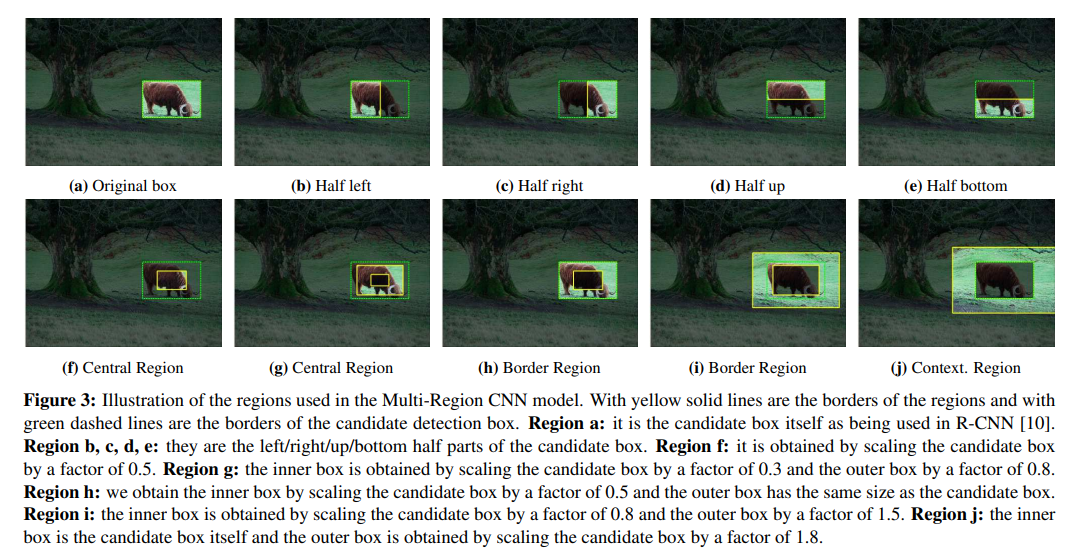

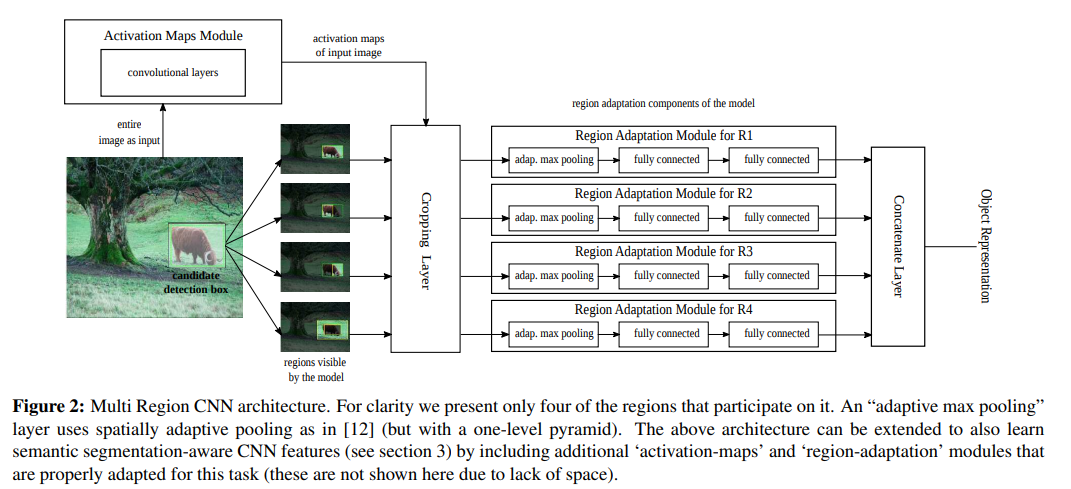

融入语义分割特征：暂时略过

bbox refinement（test time）:首先selective search产生n个候选框，然后用regression model(MLP)进行回归，然后将回归后的bbox再次用classification model进行打分，去掉低于阈值的检测框，然后再次回归，...重复T次，得到T组box(包括selective search产生的)，然后对这些bbox进行合并，得到$D_c$，之后用NMS去除冗余框（被去除的框保留下来，后面还会用到）。<br/>
bbox voting:经过NMS之后剩下$Y_c$，然后用bbox voting得到最终结果，具体如下：对于$Y_c$中的每一个bbox，从$D_c$得出与该bbox的iou阈值大于0.5的所有框的集合$N(B_{i,c})$，然后对这些框进行加权求和，$N(B_{i,c})$中每个bbox的权值为$max(0, s_{j,c})$，其中$j表示N(B_{i,c})中的第j个框，s为其score，$最终经过bbox voting后的bbox为：
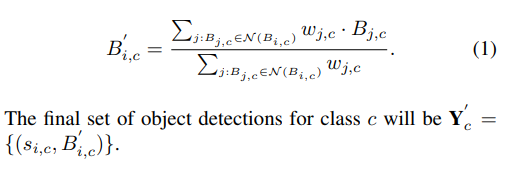

简化版本的bbox refinement如下：将RPN或ss算法产生的bbox经过NMS，然后应用bbox voting

resnet对于faster RCNN的改进中，应用的bbox refinement:先进行bbox regression,产生300个框，然后对300个框的特征（roi pooling之前）进行一次pooling操作，产生的新特征经过regression与classification，产生300个新的bbox，这600个bbox经过nms后，应用bbox voting.